# Global Country Information Dataset 2023
## This dataset provides a wealth of information about all countries worldwide, covering a wide range of indicators and attributes. 
## It encompasses demographic statistics, economic indicators, environmental factors, healthcare metrics, education statistics, and much more.

## you can find it here: https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023

In [4]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import warnings 
warnings.filterwarnings('ignore')

In [5]:
# Reads the CSV file directly from the same folder as the notebook
file_path = 'world-data-2023.csv'
df = pd.read_csv(file_path)

In [6]:
df.head(10)

Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0          Afghanistan               60           AF                58.10%   
1              Albania              105           AL                43.10%   
2              Algeria               18           DZ                17.40%   
3              Andorra              164           AD                40.00%   
4               Angola               26           AO                47.50%   
5  Antigua and Barbuda              223           AG                20.50%   
6            Argentina               17           AR                54.30%   
7              Armenia              104           AM                58.90%   
8            Australia                3           AU                48.20%   
9              Austria              109           AT                32.40%   

  Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0        652,230           323,000       32.49          93.0   
1         28,748             9,000       11.78         355.0   
2      2,381,741           317,000       24.28         213.0   
3            468               NaN        7.20         376.0   
4      1,246,700           117,000       40.73         244.0   
5            443                 0       15.33           1.0   
6      2,780,400           105,000       17.02          54.0   
7         29,743            49,000       13.99         374.0   
8      7,741,220            58,000       12.60          61.0   
9         83,871            21,000        9.70          43.0   

       Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
0                   Kabul         8,672  ...                           78.40%   
1                  Tirana         4,536  ...                           56.90%   
2                 Algiers       150,006  ...                           28.10%   
3        Andorra la Vella           469  ...                           36.40%   
4                  Luanda        34,693  ...                           33.40%   
5  St. John's, Saint John           557  ...                           24.30%   
6            Buenos Aires       201,348  ...                           17.60%   
7                 Yerevan         5,156  ...                           81.60%   
8                Canberra       375,908  ...                           19.60%   
9                  Vienna        61,448  ...                           17.90%   

  Physicians per thousand  Population  \
0                    0.28  38,041,754   
1                    1.20   2,854,191   
2                    1.72  43,053,054   
3                    3.33      77,142   
4                    0.21  31,825,295   
5                    2.76      97,118   
6                    3.96  44,938,712   
7                    4.40   2,957,731   
8                    3.68  25,766,605   
9                    5.17   8,877,067   

   Population: Labor force participation (%) Tax revenue (%) Total tax rate  \
0                                     48.90%           9.30%         71.40%   
1                                     55.70%          18.60%         36.60%   
2                                     41.20%          37.20%         66.10%   
3                                        NaN             NaN            NaN   
4                                     77.50%           9.20%         49.10%   
5                                        NaN          16.50%         43.00%   
6                                     61.30%          10.10%        106.30%   
7                                     55.60%          20.90%         22.60%   
8                                     65.50%          23.00%         47.40%   
9                                     60.70%          25.40%         51.40%   

  Unemployment rate Urban_population   Latitude   Longitude  
0            11.12%        9,797,273  33.939110   67.709953  
1            12.33%        1,747,593  41.153332   20.168331  
2            11.70%       31,510,100  28.033886    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

# Handling missing values

In [8]:
# List of columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Verify if all missing values are handled
missing_counts = df.isnull().sum()
print(missing_counts)

# Impute numerical columns with mean
numerical_columns = df.select_dtypes(include=['float64'])
numerical_columns = numerical_columns.columns[numerical_columns.isnull().any()]
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# This iterates through the categorical columns in the DataFrame that have missing values, 
#calculates the mode for each column, and then replaces the missing values with the mode value.
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns_with_missing = categorical_columns.columns[categorical_columns.isnull().any()]

for column in categorical_columns_with_missing:
    df[column] = df[column].fillna(df[column].mode().iloc[0])

Country                                       0
Density\n(P/Km2)                              0
Abbreviation                                  7
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Largest city                            

In [9]:
# Data Type Conversion:
# Columns to convert to float
columns_to_convert = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
                      'Birth Rate', 'Co2-Emissions', 'Forested Area (%)',
                      'CPI', 'CPI Change (%)', 'Fertility Rate', 'Gasoline Price', 'GDP',
                      'Gross primary education enrollment (%)', 'Armed Forces size',
                      'Gross tertiary education enrollment (%)', 'Infant mortality',
                      'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 
                      'Out of pocket health expenditure', 'Physicians per thousand', 
                      'Population', 'Population: Labor force participation (%)', 
                      'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']

# Convert columns using a lambda function
df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: float(str(x).replace(',', '').replace('$', '').replace('%', '')))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    float64
 2   Abbreviation                               195 non-null    object 
 3   Agricultural Land( %)                      195 non-null    float64
 4   Land Area(Km2)                             195 non-null    float64
 5   Armed Forces size                          195 non-null    float64
 6   Birth Rate                                 195 non-null    float64
 7   Calling Code                               195 non-null    float64
 8   Capital/Major City                         195 non-null    object 
 9   Co2-Emissions                              195 non-null    float64
 10  CPI                       

# Investigation

# Top 10 Countries: Highest Unemployment

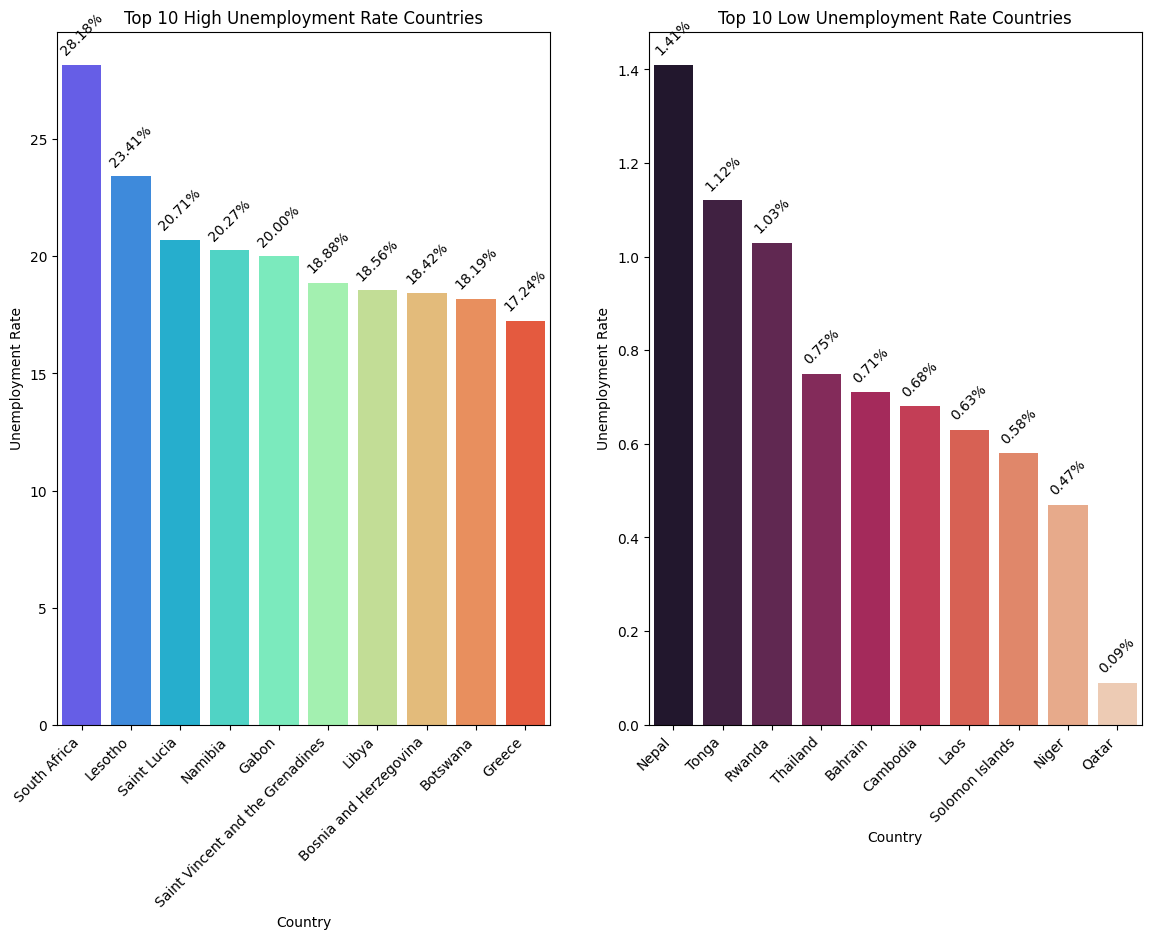

In [11]:
sorted_df = df.sort_values(by = 'Unemployment rate', ascending = False)

top_high_unemployment = sorted_df.head(10)
top_low_unemployment = sorted_df.tail(10)

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# Plot for high unemployment countries
sns.barplot(data=top_high_unemployment, x='Country', y='Unemployment rate', palette='rainbow', ax=axes[0])
axes[0].set_title('Top 10 High Unemployment Rate Countries')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Unemployment Rate')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points', rotation = 45)

# Plot for low unemployment countries
sns.barplot(data=top_low_unemployment, x='Country', y='Unemployment rate', palette='rocket', ax=axes[1])
axes[1].set_title('Top 10 Low Unemployment Rate Countries')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Unemployment Rate')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points', rotation = 45)

# Show the plots
plt.show()

# Top 10 Countries: Highest Population

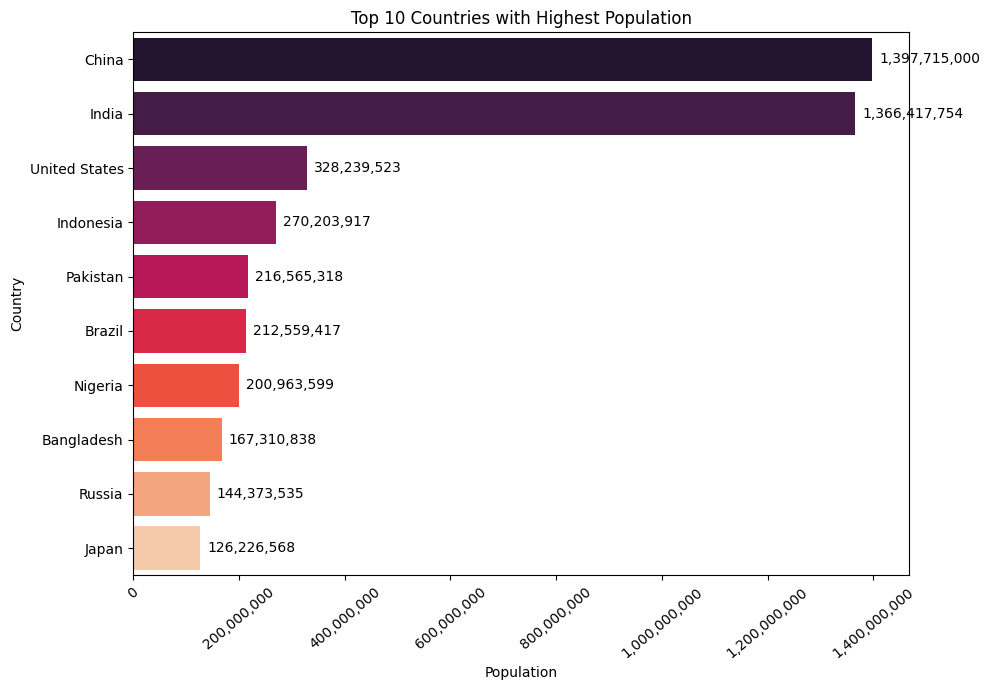

In [12]:
sorted_df = df.sort_values(by='Population', ascending=False)

top_population_country = sorted_df.head(10)

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot for top population countries
sns.barplot(data=top_population_country, x='Population', y='Country', palette='rocket', saturation=0.99, ax=axes)
axes.set_title('Top 10 Countries with Highest Population')
axes.set_xlabel('Population')
axes.set_ylabel('Country')
axes.set_xticklabels(['{:,}'.format(int(x)) for x in axes.get_xticks()], rotation = 40)
for p in axes.patches:
    axes.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                     xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Top 10 Countries: Highest Agricultural Land

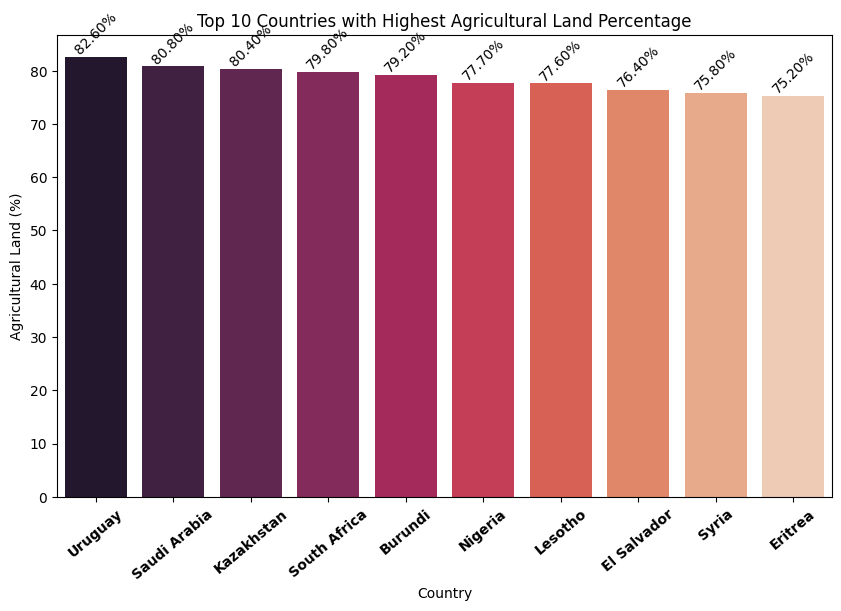

In [13]:
sorted_df = df.sort_values(by='Agricultural Land( %)', ascending=False)

top_country_Agri = sorted_df.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_country_Agri, x='Country', y='Agricultural Land( %)', palette='rocket')

# Add title and labels
plt.title('Top 10 Countries with Highest Agricultural Land Percentage')
plt.xlabel('Country')
plt.ylabel('Agricultural Land (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=40,fontweight = 'bold',fontsize = 10 )

# Annotate the bars with actual values
for index, value in enumerate(top_country_Agri['Agricultural Land( %)']):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', fontsize=10 , rotation = 45)


# Show the plot
plt.show()

# Top 10 Countries: Largest Armed Forces

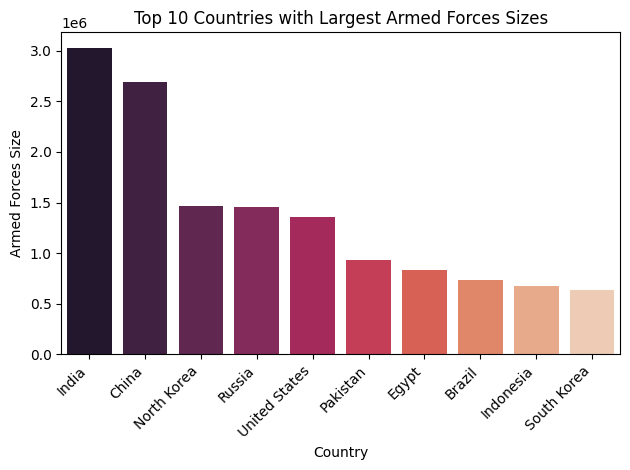

In [14]:
sorted_df = df.sort_values(by='Armed Forces size', ascending=False)

top10 = sorted_df.head(10)

sns.barplot(data=top10, x='Country', y='Armed Forces size', palette='rocket')

# Add title and labels
plt.title('Top 10 Countries with Largest Armed Forces Sizes')
plt.xlabel('Country')
plt.ylabel('Armed Forces Size')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

# Top 10 Countries: Low Infant Mortality and High Infant Mortality

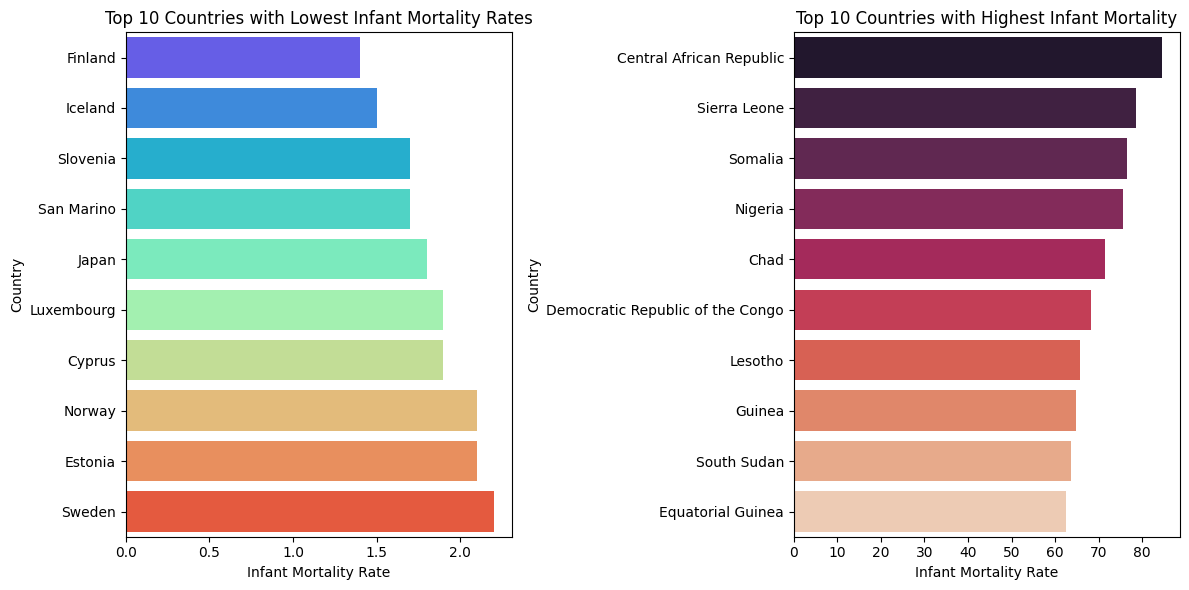

In [15]:
top_infant_mortality_countries = df.sort_values(by='Infant mortality', ascending=True).head(10)
top_infant_mortality = df.sort_values(by='Infant mortality', ascending=False).head(10)

# Set up the figure and subplots
plt.figure(figsize=(12, 6))

# First subplot (Lowest Infant Mortality)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot position 1
sns.barplot(data=top_infant_mortality_countries, x='Infant mortality', y='Country', palette='rainbow')
plt.title('Top 10 Countries with Lowest Infant Mortality Rates')
plt.xlabel('Infant Mortality Rate')
plt.ylabel('Country')
plt.xticks(rotation=0)

# Second subplot (Highest Infant Mortality)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot position 2
sns.barplot(data=top_infant_mortality, x='Infant mortality', y='Country', palette='rocket')
plt.title('Top 10 Countries with Highest Infant Mortality')
plt.xlabel('Infant Mortality Rate')
plt.ylabel('Country')
plt.xticks(rotation=0)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

# Top 10 Countries: Highest GDP (Gross Domestic Product) or PIB (Produto Interno Bruto)

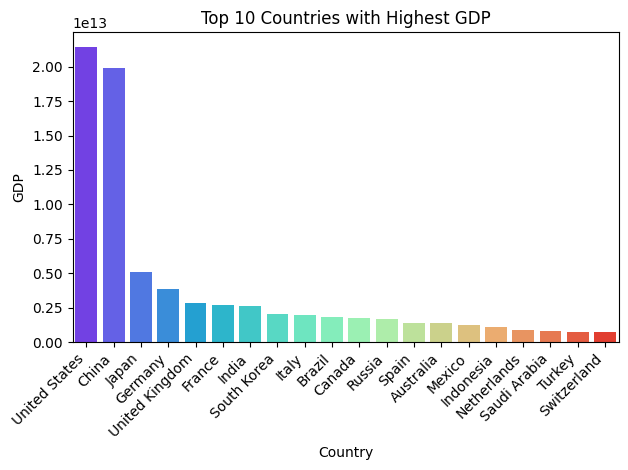

In [16]:
top_gdp_countries = df.sort_values(by='GDP', ascending=False).head(20)

sns.barplot(data=top_gdp_countries, x='Country', y='GDP', palette='rainbow')
plt.title('Top 10 Countries with Highest GDP')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Top 10 Countries: Highest Tertiary Education Enrollment Rates

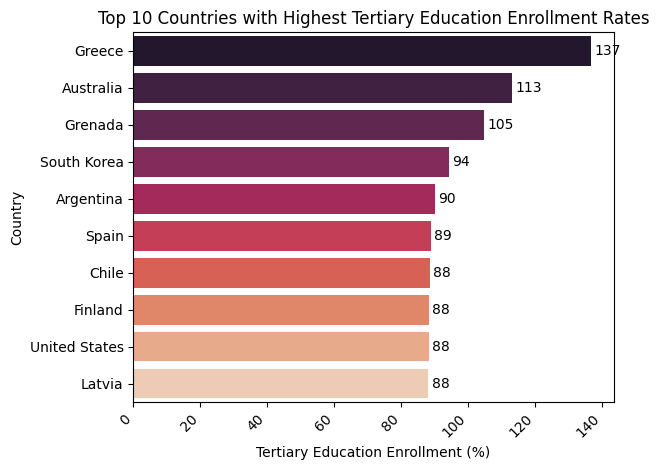

In [17]:
top_tertiary_enrollment_countries = df.sort_values(by='Gross tertiary education enrollment (%)', ascending=False).head(10)

ax = sns.barplot(data=top_tertiary_enrollment_countries, x='Gross tertiary education enrollment (%)', y='Country', palette='rocket')
plt.title('Top 10 Countries with Highest Tertiary Education Enrollment Rates')
plt.xlabel('Tertiary Education Enrollment (%)')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the exact tertiary enrollment value
for index, value in enumerate(top_tertiary_enrollment_countries['Gross tertiary education enrollment (%)']):
    ax.text(value + 1, index, f'{value:.0f}', va='center', color='black')

plt.tight_layout()
plt.show()

# Urbanization Trends by Country

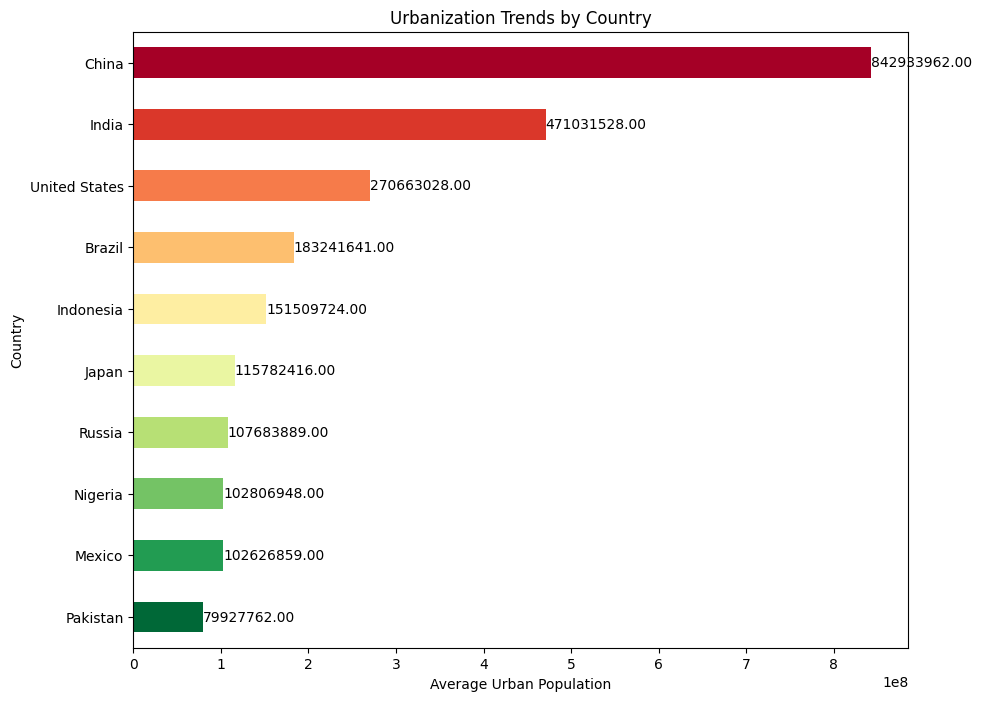

In [18]:
import matplotlib.pyplot as plt

subset_countries = 10 
urbanization_by_country = df.groupby('Country')['Urban_population'].mean().sort_values(ascending=False).head(subset_countries)

# color palette from Matplotlib
colors = plt.cm.get_cmap('RdYlGn', subset_countries)

plt.figure(figsize=(10, 8))
ax = urbanization_by_country.plot(kind='barh', color=colors(range(subset_countries)))
plt.title('Urbanization Trends by Country')
plt.xlabel('Average Urban Population')
plt.ylabel('Country')
plt.gca().invert_yaxis()

# Add data labels to the bars
for index, value in enumerate(urbanization_by_country):
    ax.text(value + 2, index, f'{value:.2f}', va='center', color='black')

plt.show()

# Distribution of Life Expectancy

In [19]:
# Top 10 countries in Life expectancy
top_countries = df.nlargest(10, 'Life expectancy')

top_countries_names = top_countries['Country']
top_countries_life_expectancy = top_countries['Life expectancy']

# Print the country names and their corresponding life expectancy values
for name, expectancy in zip(top_countries_names, top_countries_life_expectancy):
    print(f"Country: {name}, Life Expectancy: {expectancy}")

Country: San Marino, Life Expectancy: 85.4
Country: Japan, Life Expectancy: 84.2
Country: Switzerland, Life Expectancy: 83.6
Country: Spain, Life Expectancy: 83.3
Country: Singapore, Life Expectancy: 83.1
Country: Liechtenstein, Life Expectancy: 83.0
Country: Italy, Life Expectancy: 82.9
Country: Israel, Life Expectancy: 82.8
Country: Norway, Life Expectancy: 82.8
Country: Australia, Life Expectancy: 82.7


In [20]:
fig = px.histogram(df, x='Life expectancy', nbins=20, marginal='box', title='Interactive Distribution of Life Expectancy')
fig.update_traces(marker_color='orange')
fig.update_layout(xaxis_title='Life Expectancy', yaxis_title='Number of Countries')

# Markers data
markers_data = {
    'Country': ['San Marino', 'Japan', 'Switzerland', 'Spain', 'Singapore', 'Liechtenstein', 'Italy', 'Israel', 'Norway', 'Australia'],
    'Life expectancy': [85.4, 84.2, 83.6, 83.3, 83.1, 83.0, 82.9, 82.8, 82.8, 82.7]
}

# Count the frequency of each life expectancy value
life_expectancy_counts = Counter(markers_data['Life expectancy'])

# Define a color scale for the countries
color_scale = px.colors.qualitative.Set1

scatter_trace = go.Scatter(
    x=markers_data['Life expectancy'],
    y=[life_expectancy_counts[val] for val in markers_data['Life expectancy']],
    mode='markers',
    text=markers_data['Country'],
    marker=dict(color=color_scale, size=10),
    showlegend=False,
    name='Countries'
)

fig.add_trace(scatter_trace)

# Explanation text
explanation_text = 'Hover over markers to see the highest Life Expectancy countries<br>followed by the Number of Countries with this exactly expectancy'

# Create a text annotation for the explanation
fig.add_annotation(
    text=explanation_text,
    xref='paper', yref='paper',
    x=0.5, y=0.5,  # Adjusted coordinates to place the annotation outside the plot
    xanchor='right', yanchor='middle',  # Set anchor point for positioning
    showarrow=False,
    font=dict(size=10),
    bordercolor="black",
    bgcolor="white",
    borderpad=4
)

fig.show()

# Correlation Analysis

In [21]:
# New df
original_df = df

original_df.head()

Country  Density\n(P/Km2) Abbreviation  Agricultural Land( %)  \
0  Afghanistan              60.0           AF                   58.1   
1      Albania             105.0           AL                   43.1   
2      Algeria              18.0           DZ                   17.4   
3      Andorra             164.0           AD                   40.0   
4       Angola              26.0           AO                   47.5   

   Land Area(Km2)  Armed Forces size  Birth Rate  Calling Code  \
0        652230.0           323000.0       32.49          93.0   
1         28748.0             9000.0       11.78         355.0   
2       2381741.0           317000.0       24.28         213.0   
3           468.0             2000.0        7.20         376.0   
4       1246700.0           117000.0       40.73         244.0   

  Capital/Major City  Co2-Emissions  ...  Out of pocket health expenditure  \
0              Kabul         8672.0  ...                              78.4   
1             Tirana         4536.0  ...                              56.9   
2            Algiers       150006.0  ...                              28.1   
3   Andorra la Vella          469.0  ...                              36.4   
4             Luanda        34693.0  ...                              33.4   

   Physicians per thousand  Population  \
0                     0.28  38041754.0   
1                     1.20   2854191.0   
2                     1.72  43053054.0   
3                     3.33     77142.0   
4                     0.21  31825295.0   

   Population: Labor force participation (%)  Tax revenue (%)  Total tax rate  \
0                                       48.9              9.3            71.4   
1                                       55.7             18.6            36.6   
2                                       41.2             37.2            66.1   
3                                       65.1             19.5            36.6   
4                                       77.5              9.2            49.1   

   Unemployment rate  Urban_population   Latitude  Longitude  
0              11.12         9797273.0  33.939110  67.709953  
1              12.33         1747593.0  41.153332  20.168331  
2              11.70        31510100.0  28.033886   1.659626  
3               4.59           67873.0  42.506285   1.521801  
4               6.89        21061025.0 -11.202692  17.873887  

[5 rows x 35 columns]

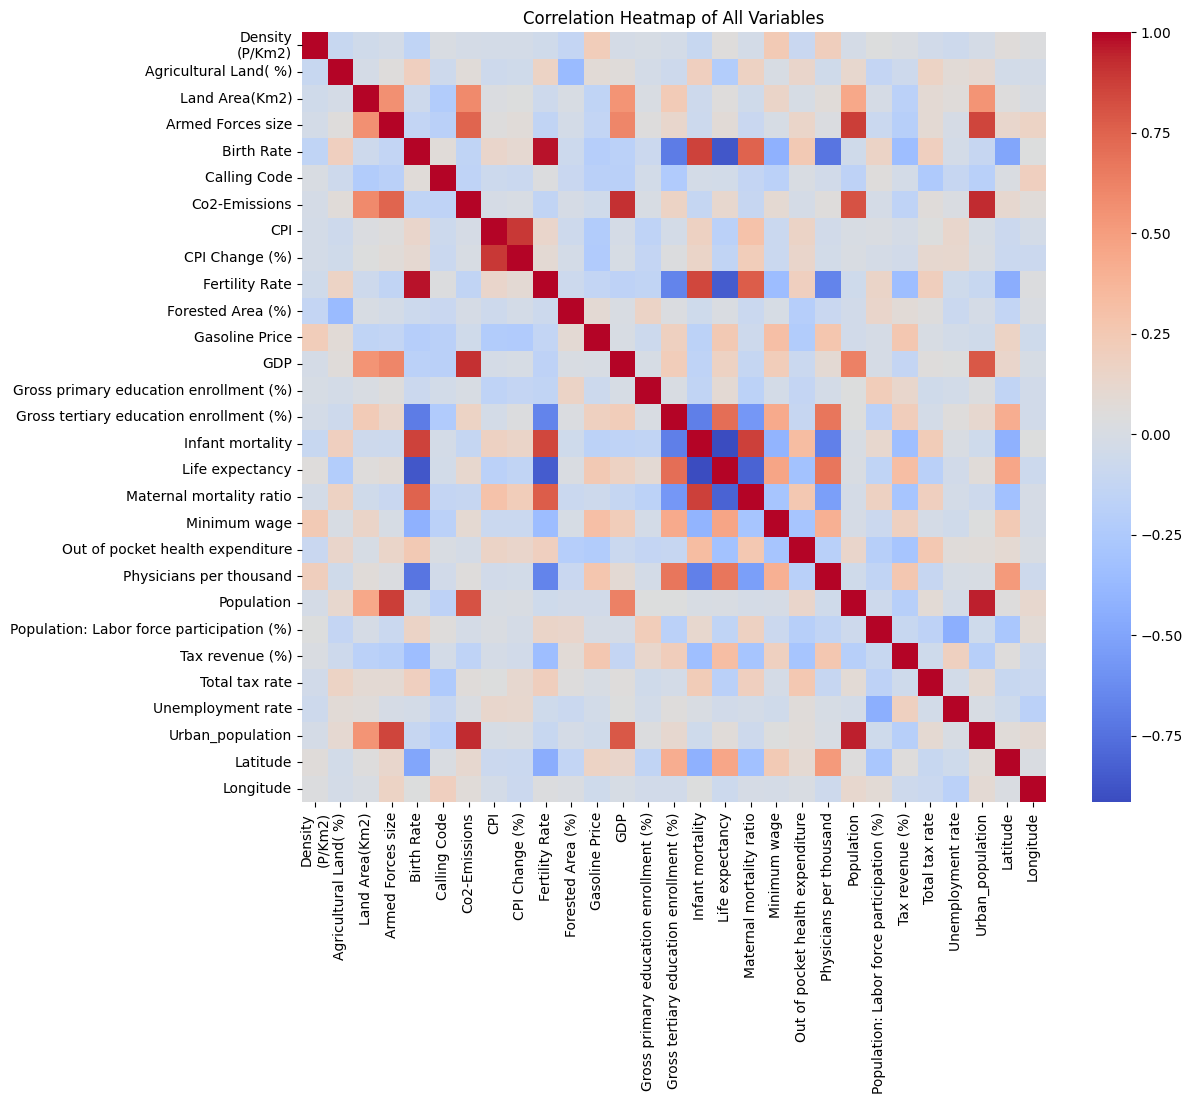

In [22]:
# heat map
plt.figure(figsize=(12, 10))
sns.heatmap(original_df.corr(), annot=False, cmap='coolwarm')

plt.title('Correlation Heatmap of All Variables')
plt.show()

In [23]:
# Series that shows the correlation coefficients between each pair of columns 
correlation_mat = original_df.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

Density\n(P/Km2)  Density\n(P/Km2)         1.000000
                  Agricultural Land( %)   -0.105700
                  Land Area(Km2)          -0.053711
                  Armed Forces size       -0.029272
                  Birth Rate              -0.146719
                                             ...   
Longitude         Total tax rate          -0.087021
                  Unemployment rate       -0.176567
                  Urban_population         0.092379
                  Latitude                 0.013635
                  Longitude                1.000000
Length: 841, dtype: float64

In [24]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Infant mortality                        Life expectancy                          -0.915081
Life expectancy                         Infant mortality                         -0.915081
Birth Rate                              Life expectancy                          -0.865804
Life expectancy                         Birth Rate                               -0.865804
                                        Fertility Rate                           -0.846317
                                                                                    ...   
Tax revenue (%)                         Tax revenue (%)                           1.000000
Total tax rate                          Total tax rate                            1.000000
Unemployment rate                       Unemployment rate                         1.000000
Gross primary education enrollment (%)  Gross primary education enrollment (%)    1.000000
Longitude                               Longitude                                 1.000000

In [25]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs != 1.0)]
high_corr

Physicians per thousand                  Latitude                                   0.513955
Latitude                                 Physicians per thousand                    0.513955
Land Area(Km2)                           Urban_population                           0.547966
Urban_population                         Land Area(Km2)                             0.547966
GDP                                      Land Area(Km2)                             0.550901
Land Area(Km2)                           GDP                                        0.550901
Armed Forces size                        Land Area(Km2)                             0.560318
Land Area(Km2)                           Armed Forces size                          0.560318
Co2-Emissions                            Land Area(Km2)                             0.591636
Land Area(Km2)                           Co2-Emissions                              0.591636
GDP                                      Armed Forces size            

# Exploration of correlations between economic indicators such as GDP and various socio-economic factors.

In [26]:
# Subset of columns for the analysis
economic_indicators = original_df[['GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)','Total tax rate', 'Unemployment rate']]
economic_indicators.head()

GDP  Gross primary education enrollment (%)  \
0  1.910135e+10                                   104.0   
1  1.527808e+10                                   107.0   
2  1.699882e+11                                   109.9   
3  3.154058e+09                                   106.4   
4  9.463542e+10                                   113.5   

   Gross tertiary education enrollment (%)  Total tax rate  Unemployment rate  
0                                      9.7            71.4              11.12  
1                                     55.0            36.6              12.33  
2                                     51.4            66.1              11.70  
3                                     10.2            36.6               4.59  
4                                      9.3            49.1               6.89

In [27]:
null_values = economic_indicators.isnull()
null_values

GDP  Gross primary education enrollment (%)  \
0    False                                   False   
1    False                                   False   
2    False                                   False   
3    False                                   False   
4    False                                   False   
..     ...                                     ...   
190  False                                   False   
191  False                                   False   
192  False                                   False   
193  False                                   False   
194  False                                   False   

     Gross tertiary education enrollment (%)  Total tax rate  \
0                                      False           False   
1                                      False           False   
2                                      False           False   
3                                      False           False   
4                                      False           False   
..                                       ...             ...   
190                                    False           False   
191                                    False           False   
192                                    False           False   
193                                    False           False   
194                                    False           False   

     Unemployment rate  
0                False  
1                False  
2                False  
3                False  
4                False  
..                 ...  
190              False  
191              False  
192              False  
193              False  
194              False  

[195 rows x 5 columns]

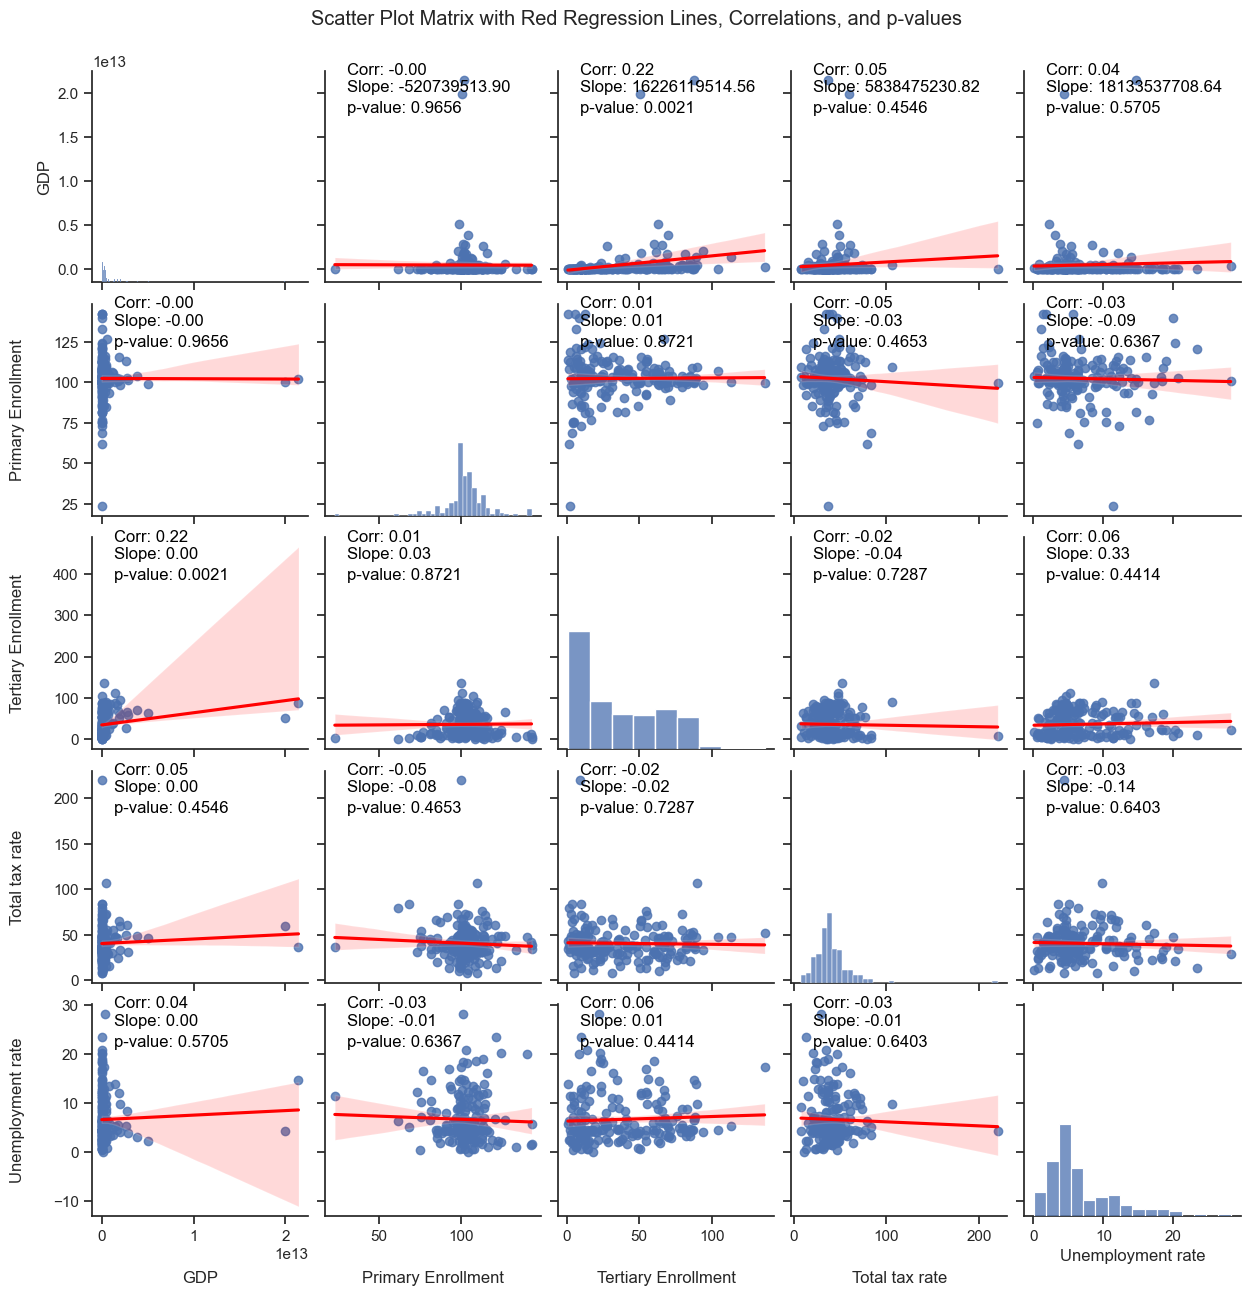

In [28]:
# Sample DataFrame
economic_indicators = original_df[['GDP', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Total tax rate', 'Unemployment rate']]
sns.set(style="ticks")

# Nicknames for the long column names
column_nicknames = {
    'Gross primary education enrollment (%)': 'Primary Enrollment',
    'Gross tertiary education enrollment (%)': 'Tertiary Enrollment'
}

# Create a pair plot with regression lines
g = sns.pairplot(economic_indicators, kind="reg", plot_kws={'line_kws':{'color':'red'}})

# Iterate through the axes and add correlation coefficient and regression slope
for ax in g.axes.flat:
    x_var = ax.get_xlabel()
    y_var = ax.get_ylabel()
    
    if x_var != '' and y_var != '' and x_var in economic_indicators.columns and y_var in economic_indicators.columns:
        slope, intercept, r_value, p_value, std_err = stats.linregress(economic_indicators[x_var], economic_indicators[y_var])
        
        # Add correlation coefficient and regression slope to the plot
        ax.annotate(f"Corr: {r_value:.2f}\nSlope: {slope:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes, color='black')
        
        # Add p-value to the plot
        ax.annotate(f"p-value: {p_value:.4f}", xy=(0.1, 0.8), xycoords=ax.transAxes, color='black')
        
        # Lower the x-axis label a little bit
        ax.set_xlabel(column_nicknames.get(ax.get_xlabel(), ax.get_xlabel()), labelpad=20)
        ax.set_ylabel(column_nicknames.get(ax.get_ylabel(), ax.get_ylabel()), labelpad=20)

# Adjust the title position
g.fig.suptitle('Scatter Plot Matrix with Red Regression Lines, Correlations, and p-values', y=1.02)

plt.show()

# Interpretation

- These regression lines provide insight into the strength and direction of the relationships between pairs of variables. 
- Additionally, the correlation coefficient values help quantify the degree of association between variables, with values closer 
    to 1 indicating stronger positive correlations and values closer to -1 indicating stronger negative correlations.

- Furthermore, the p-values associated with each regression analysis played a pivotal role in assessing the 
    statistical significance of the relationships observed. A low p-value suggests that the observed 
    relationship between variables is not likely to have occurred by chance alone. 
- In other words, it indicates a higher degree of confidence in the validity of the observed relationship.

# Regression Analysis - Linear Regression

# Birth Rate vs GDP

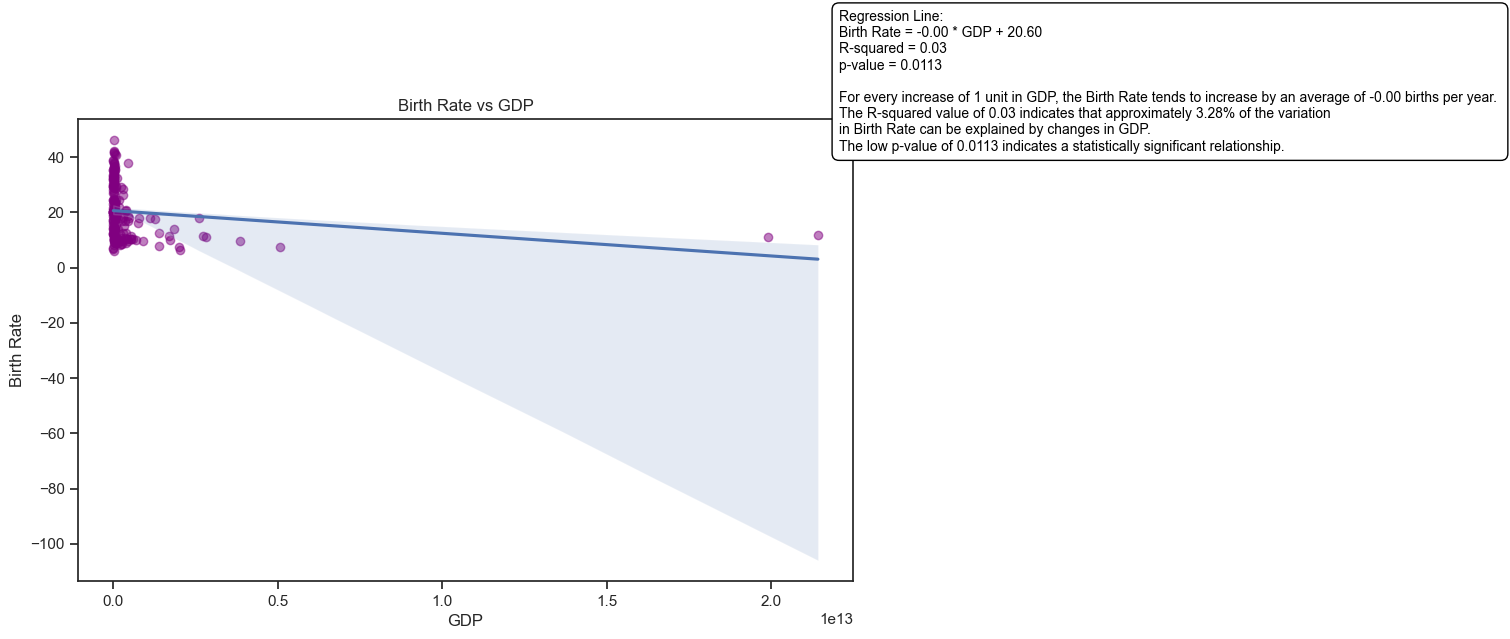

In [29]:
# Create the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='GDP', y='Birth Rate', scatter_kws={'color': 'purple', 'alpha': 0.5})
plt.title('Birth Rate vs GDP')
plt.xlabel('GDP')
plt.ylabel('Birth Rate')

# Get the regression line parameters
slope, intercept, r_value, p_value, std_err = stats.linregress(df['GDP'], df['Birth Rate'])

# Calculate the R-squared value
r_squared = r_value**2

# Define the text explanation
explanation_text = (
    f"Regression Line:\n"
    f"Birth Rate = {slope:.2f} * GDP + {intercept:.2f}\n"
    f"R-squared = {r_squared:.2f}\n"
    f"p-value = {p_value:.4f}\n\n"
    f"For every increase of 1 unit in GDP, the Birth Rate tends to increase by an average of {slope:.2f} births per year. \n"
    f"The R-squared value of {r_squared:.2f} indicates that approximately {r_squared*100:.2f}% of the variation\nin Birth Rate can be explained by changes in GDP.\n"
    f"The low p-value of {p_value:.4f} indicates a statistically significant relationship."
)

# Create a smaller box outside the plot for the explanation text
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
plt.text(df['GDP'].max() * 1.03, df['Birth Rate'].max() * 0.92, explanation_text, fontsize=10, color='black', bbox=bbox_props)

plt.show()

# Fertility Rate vs Infant mortality

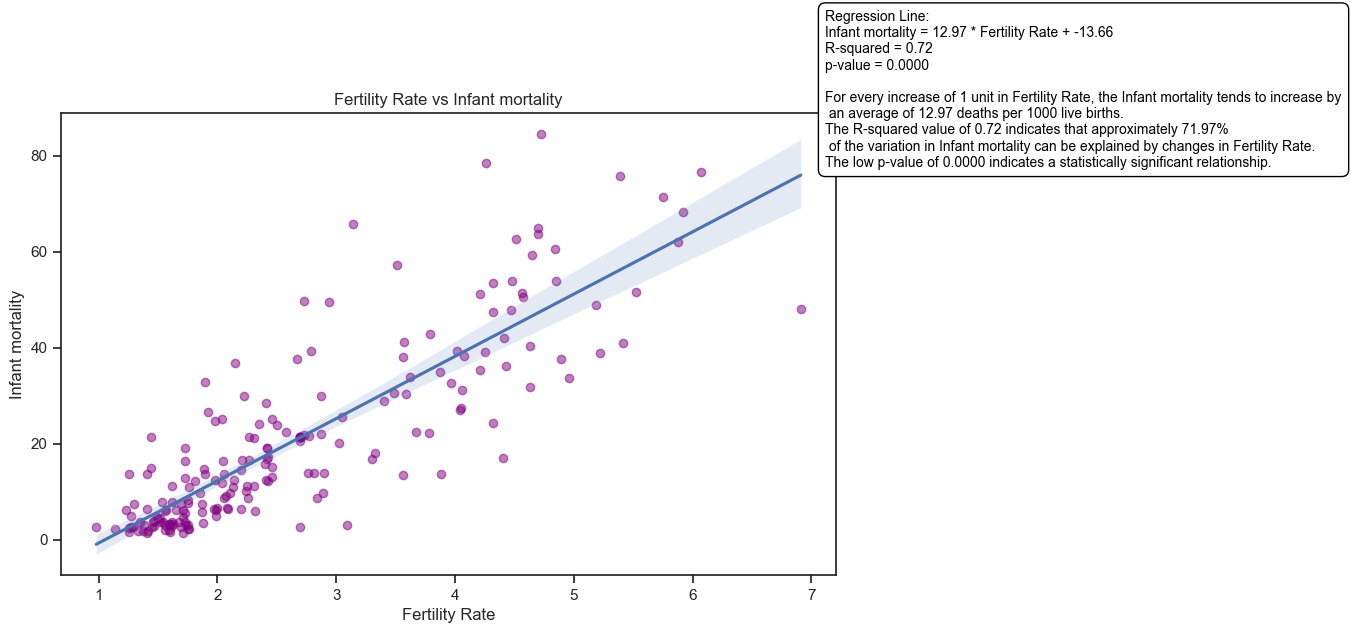

In [30]:
# Create the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Fertility Rate', y='Infant mortality', scatter_kws={'color': 'purple', 'alpha': 0.5})
plt.title('Fertility Rate vs Infant mortality')
plt.xlabel('Fertility Rate')
plt.ylabel('Infant mortality')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Fertility Rate'], df['Infant mortality'])

# Define the text explanation
explanation_text = (
    f"Regression Line:\n"
    f"Infant mortality = {slope:.2f} * Fertility Rate + {intercept:.2f}\n"
    f"R-squared = {r_value**2:.2f}\n"
    f"p-value = {p_value:.4f}\n\n"
    f"For every increase of 1 unit in Fertility Rate, the Infant mortality tends to increase by\n an average of {slope:.2f} deaths per 1000 live births. \n"
    f"The R-squared value of {r_value**2:.2f} indicates that approximately {r_value**2*100:.2f}%\n of the variation in Infant mortality can be explained by changes in Fertility Rate.\n"
    f"The low p-value of {p_value:.4f} indicates a statistically significant relationship."
)

# Create a smaller box outside the plot for the explanation text
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
plt.text(df['Fertility Rate'].max() * 1.03, df['Infant mortality'].max() * 0.92, explanation_text, fontsize=10, color='black', bbox=bbox_props)

plt.show()

# Fertility Rate vs Maternal Mortality Ratio

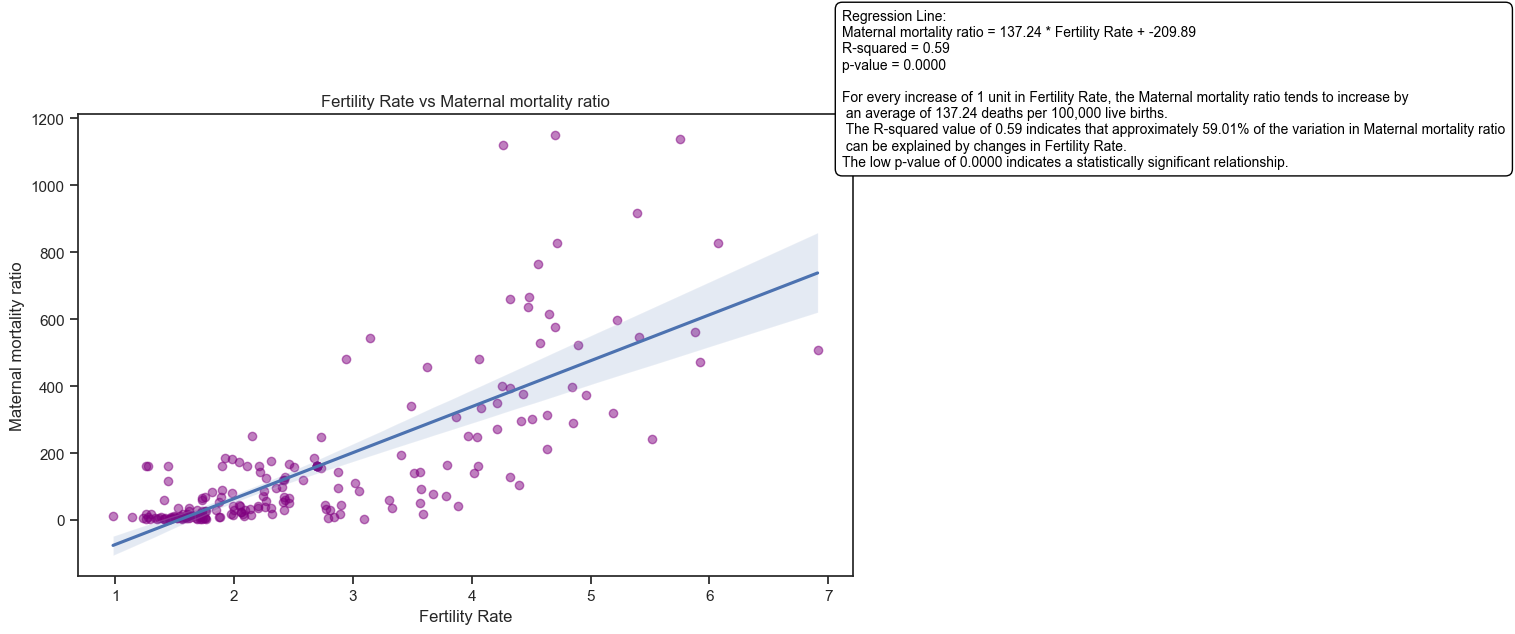

In [31]:
# Create the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Fertility Rate', y='Maternal mortality ratio', scatter_kws={'color': 'purple', 'alpha': 0.5})
plt.title('Fertility Rate vs Maternal mortality ratio')
plt.xlabel('Fertility Rate')
plt.ylabel('Maternal mortality ratio')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Fertility Rate'], df['Maternal mortality ratio'])

# Define the text explanation
explanation_text = (
    f"Regression Line:\n"
    f"Maternal mortality ratio = {slope:.2f} * Fertility Rate + {intercept:.2f}\n"
    f"R-squared = {r_value**2:.2f}\n"
    f"p-value = {p_value:.4f}\n\n"
    f"For every increase of 1 unit in Fertility Rate, the Maternal mortality ratio tends to increase by\n an average of {slope:.2f} deaths per 100,000 live births.\n "
    f"The R-squared value of {r_value**2:.2f} indicates that approximately {r_value**2*100:.2f}% of the variation in Maternal mortality ratio\n can be explained by changes in Fertility Rate.\n"
    f"The low p-value of {p_value:.4f} indicates a statistically significant relationship."
)

# Create a smaller box outside the plot for the explanation text
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
plt.text(df['Fertility Rate'].max() * 1.03, df['Maternal mortality ratio'].max() * 0.92, explanation_text, fontsize=10, color='black', bbox=bbox_props)

plt.show()

# Gross tertiary education enrollment (%) vs Life expectancy

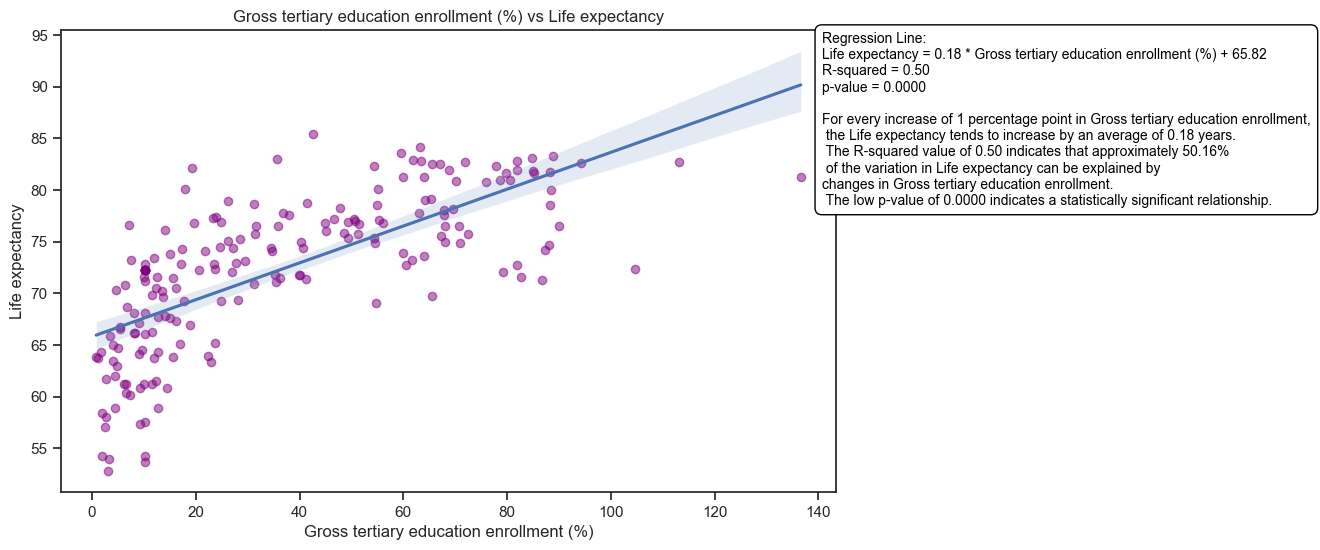

In [32]:
# Create the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Gross tertiary education enrollment (%)', y='Life expectancy', scatter_kws={'color': 'purple', 'alpha': 0.5})
plt.title('Gross tertiary education enrollment (%) vs Life expectancy')
plt.xlabel('Gross tertiary education enrollment (%)')
plt.ylabel('Life expectancy')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Gross tertiary education enrollment (%)'], df['Life expectancy'])

# Define the text explanation
explanation_text = (
    f"Regression Line:\n"
    f"Life expectancy = {slope:.2f} * Gross tertiary education enrollment (%) + {intercept:.2f}\n"
    f"R-squared = {r_value**2:.2f}\n"
    f"p-value = {p_value:.4f}\n\n"
    f"For every increase of 1 percentage point in Gross tertiary education enrollment,\n the Life expectancy tends to increase by an average of {slope:.2f} years.\n "
    f"The R-squared value of {r_value**2:.2f} indicates that approximately {r_value**2*100:.2f}%\n of the variation in Life expectancy can be explained by \nchanges in Gross tertiary education enrollment.\n "
    f"The low p-value of {p_value:.4f} indicates a statistically significant relationship."
)

# Create a smaller box outside the plot for the explanation text
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
plt.text(df['Gross tertiary education enrollment (%)'].max() * 1.03, df['Life expectancy'].max() * 0.92, explanation_text, fontsize=10, color='black', bbox=bbox_props)

plt.show()

# Unemployment Rate vs Tax revenue (%)

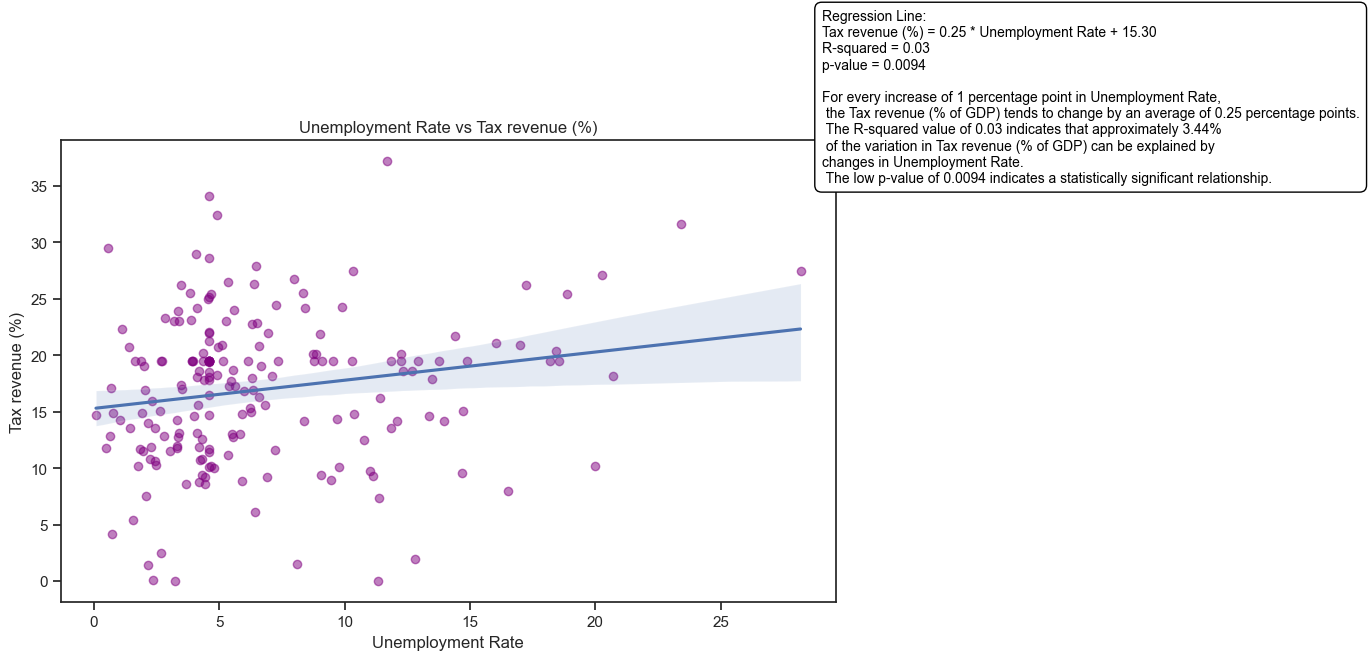

In [33]:
# Regression plot for Unemployment Rate vs Tax revenue (%)
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Unemployment rate', y='Tax revenue (%)', scatter_kws={'color': 'purple', 'alpha': 0.5})
plt.title('Unemployment Rate vs Tax revenue (%)')
plt.xlabel('Unemployment Rate')
plt.ylabel('Tax revenue (%)')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Unemployment rate'], df['Tax revenue (%)'])

# Define the text explanation for Unemployment Rate vs Tax revenue (%)
explanation_text_unemployment_tax = (
    f"Regression Line:\n"
    f"Tax revenue (%) = {slope:.2f} * Unemployment Rate + {intercept:.2f}\n"
    f"R-squared = {r_value**2:.2f}\n"
    f"p-value = {p_value:.4f}\n\n"
    f"For every increase of 1 percentage point in Unemployment Rate,\n the Tax revenue (% of GDP) tends to change by an average of {slope:.2f} percentage points.\n "
    f"The R-squared value of {r_value**2:.2f} indicates that approximately {r_value**2*100:.2f}%\n of the variation in Tax revenue (% of GDP) can be explained by \nchanges in Unemployment Rate.\n "
    f"The low p-value of {p_value:.4f} indicates a statistically significant relationship."
)

# Create a smaller box outside the plot for the explanation text for Unemployment Rate vs Tax revenue (%)
bbox_props_unemployment_tax = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
plt.text(df['Unemployment rate'].max() * 1.03, df['Tax revenue (%)'].max() * 0.95, explanation_text_unemployment_tax, fontsize=10, color='black', bbox=bbox_props_unemployment_tax)

plt.show()

# Correlation Between Urban Population and Life Expectancy / Education Enrollment:

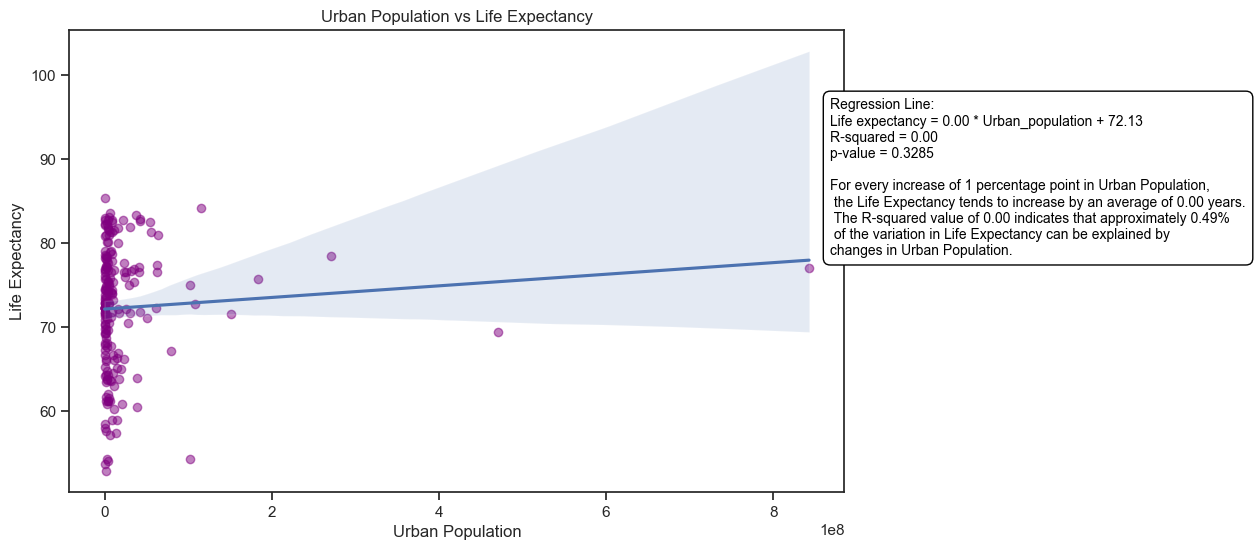

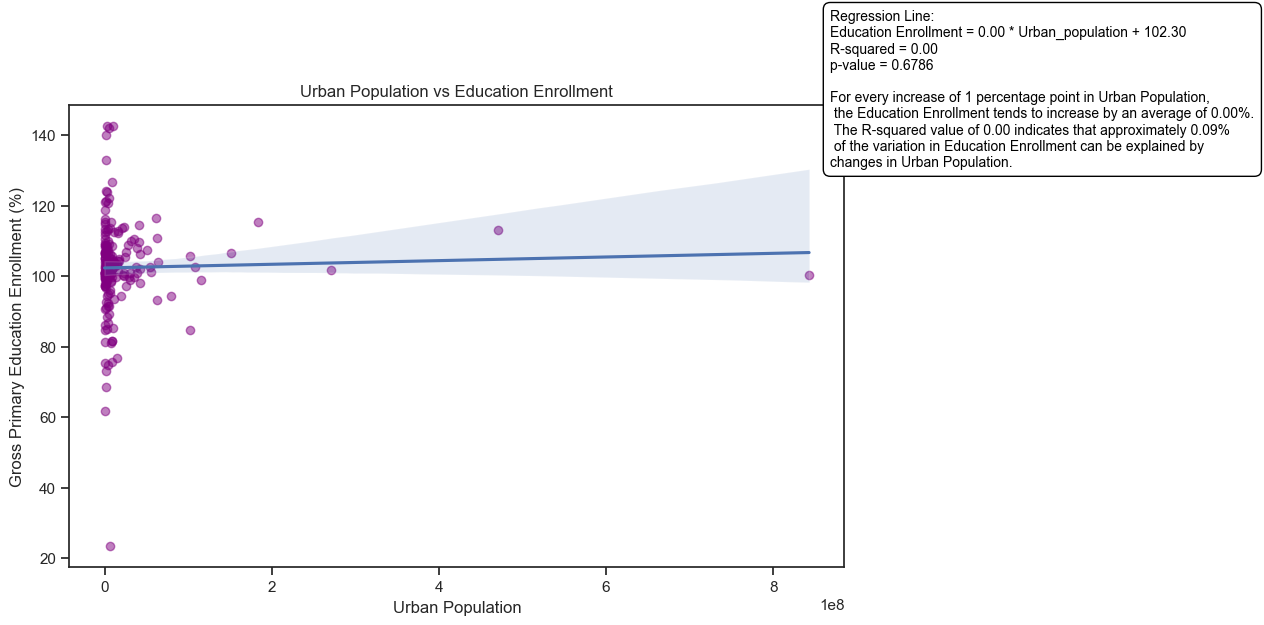

In [34]:
# Regression plot for Urban Population vs Life Expectancy / Education Enrollment
plt.figure(figsize=(10, 6))

# Life Expectancy
sns.regplot(data=df, x='Urban_population', y='Life expectancy', scatter_kws={'color': 'purple', 'alpha': 0.5})
plt.title('Urban Population vs Life Expectancy')
plt.xlabel('Urban Population')
plt.ylabel('Life Expectancy')

# Perform linear regression for Life Expectancy
slope_life, intercept_life, r_value_life, p_value_life, std_err_life = stats.linregress(df['Urban_population'], df['Life expectancy'])

# Define the text explanation for Urban Population vs Life Expectancy
explanation_text_life = (
    f"Regression Line:\n"
    f"Life expectancy = {slope_life:.2f} * Urban_population + {intercept_life:.2f}\n"
    f"R-squared = {r_value_life**2:.2f}\n"
    f"p-value = {p_value_life:.4f}\n\n"
    f"For every increase of 1 percentage point in Urban Population,\n the Life Expectancy tends to increase by an average of {slope_life:.2f} years.\n "
    f"The R-squared value of {r_value_life**2:.2f} indicates that approximately {r_value_life**2*100:.2f}%\n of the variation in Life Expectancy can be explained by \nchanges in Urban Population."
)

# Create a smaller box outside the plot for the explanation text for Urban Population vs Life Expectancy
bbox_props_life = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
plt.text(df['Urban_population'].max() * 1.03, df['Life expectancy'].max() * 0.92, explanation_text_life, fontsize=10, color='black', bbox=bbox_props_life)

plt.show()

# Education Enrollment
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Urban_population', y='Gross primary education enrollment (%)', scatter_kws={'color': 'purple', 'alpha': 0.5})
plt.title('Urban Population vs Education Enrollment')
plt.xlabel('Urban Population')
plt.ylabel('Gross Primary Education Enrollment (%)')

# Perform linear regression for Education Enrollment
slope_education, intercept_education, r_value_education, p_value_education, std_err_education = stats.linregress(df['Urban_population'], df['Gross primary education enrollment (%)'])

# Define the text explanation for Urban Population vs Education Enrollment
explanation_text_education = (
    f"Regression Line:\n"
    f"Education Enrollment = {slope_education:.2f} * Urban_population + {intercept_education:.2f}\n"
    f"R-squared = {r_value_education**2:.2f}\n"
    f"p-value = {p_value_education:.4f}\n\n"
    f"For every increase of 1 percentage point in Urban Population,\n the Education Enrollment tends to increase by an average of {slope_education:.2f}%.\n "
    f"The R-squared value of {r_value_education**2:.2f} indicates that approximately {r_value_education**2*100:.2f}%\n of the variation in Education Enrollment can be explained by \nchanges in Urban Population."
)

# Create a smaller box outside the plot for the explanation text for Urban Population vs Education Enrollment
bbox_props_education = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
plt.text(df['Urban_population'].max() * 1.03, df['Gross primary education enrollment (%)'].max() * 0.92, explanation_text_education, fontsize=10, color='black', bbox=bbox_props_education)

plt.show()